# 7. Gráficas con el paquete `Plots.jl`
> Por Arturo Erdely

Existen diversos paquetes en `Julia` para gráficas, peor hasta el momento y sin duda el más popular y accesible es el paquete `Plots.jl` (la extensión `.jl` corresponde a código escrito en Julia). Una vez instalado dicho paquete, cada vez que queramos utilizarlo debemos ejecutar la siguiente instrucción:

In [1]:
using Plots

Puede tardar un poco en cargarse, mientras eso sucede aparecrerá a la izquierda un asterisco entre corchetes `[*]` y en cuanto termine deberá aparecer algún número entre corchetes. De igual forma, la primer vez que se genera un gráfico, por simple que sea, también tarda un poco. La razón es que se compila una primera vez, y una vez hecho esto los siguientes gráficos se generán bastante rápido. Probemos por ejemplo:

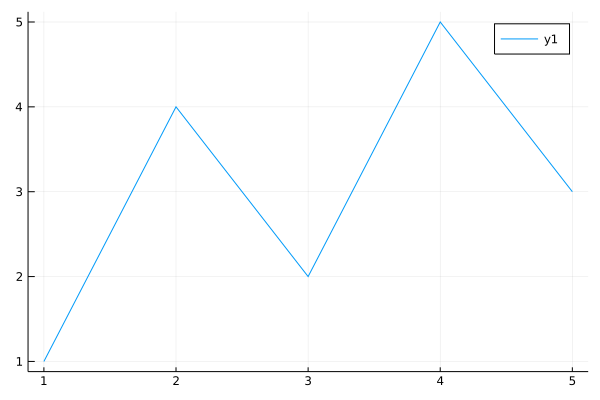

In [2]:
plot([1, 4, 2, 5, 3])

Ejecutemos nuevamente la instrucción anterior, para comprobar que efectivamente el gráfico aparece más rápido:

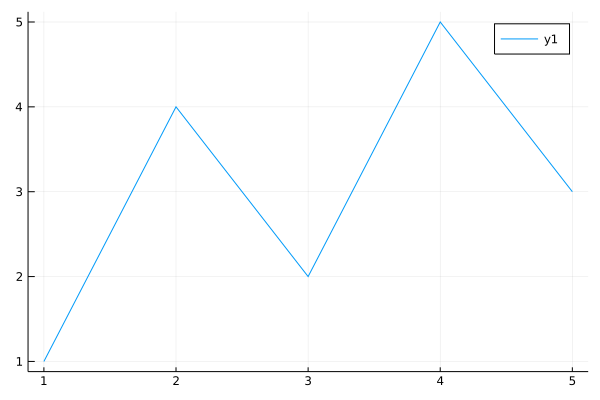

In [3]:
plot([1, 4, 2, 5, 3])

Comenzaremos por lo básico, mediante ejemplos sencillos. Una función esencial es `plot`

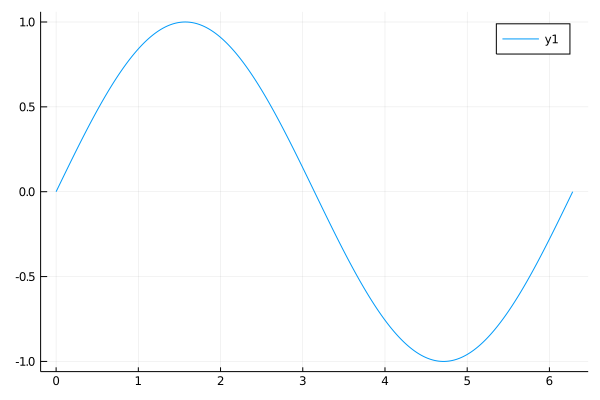

In [4]:
x = range(0, 2π, length = 1000)
y = sin.(x)
plot(x, y)

Ahora observa los parámetros adicionales que se agregan para modificar la gráfica, como `lw`, `legend` o `color` entre otros:

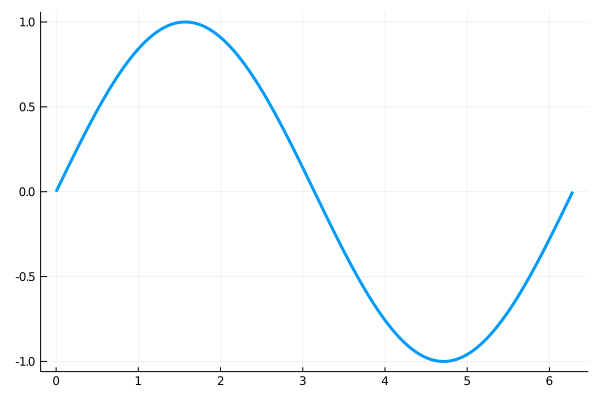

In [5]:
plot(x, y, lw = 3, legend = false) # `lw` significa line width

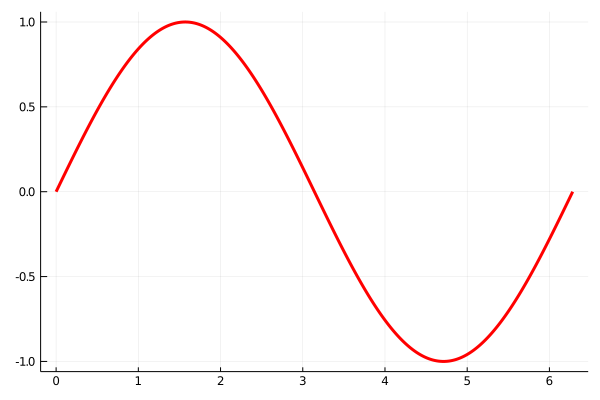

In [6]:
plot(x, y, lw = 3, color = :red, legend = false)

Las instrucciones seguidas del símbolo `!` agregan algo a la última gráfica que se haya generado:

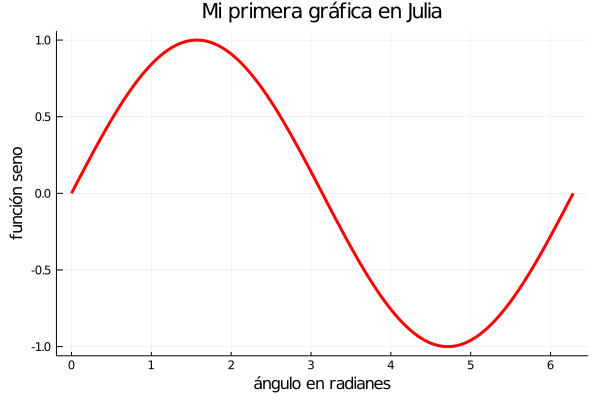

In [7]:
xaxis!("ángulo en radianes")
yaxis!("función seno")
title!("Mi primera gráfica en Julia")

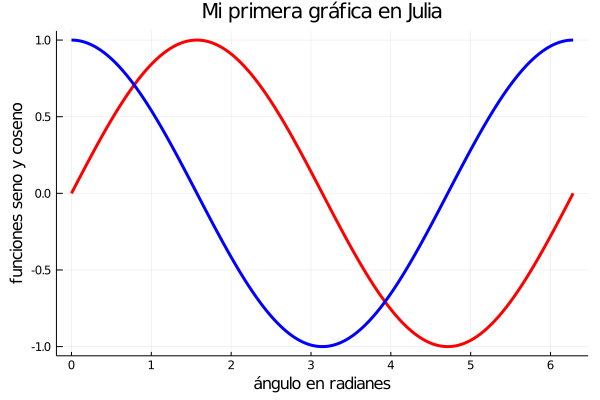

In [8]:
z = cos.(x)
plot!(x, z, color = :blue, lw = 3)
yaxis!("funciones seno y coseno")

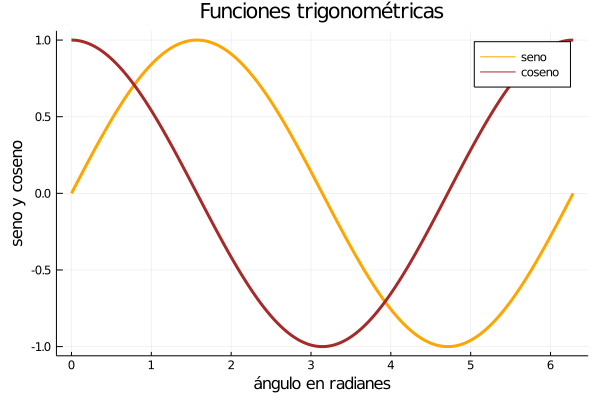

In [9]:
plot(x, y, lw = 3, color = :orange, label = "seno")
xaxis!("ángulo en radianes")
yaxis!("seno y coseno")
title!("Funciones trigonométricas")
plot!(x, z, lw = 3, color = :brown, label = "coseno")

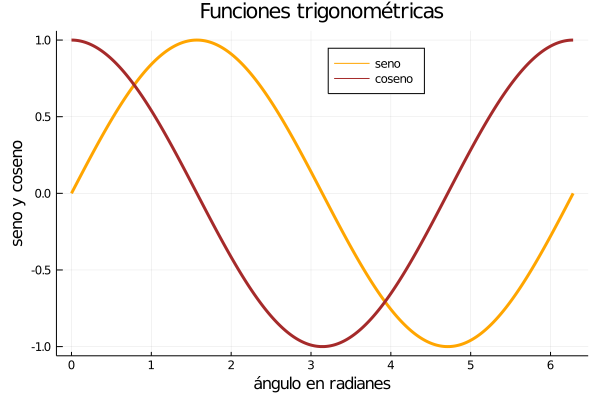

In [10]:
plot(x, y, lw = 3, color = :orange, label = "seno", legend = (0.6, 0.9))
xaxis!("ángulo en radianes")
yaxis!("seno y coseno")
title!("Funciones trigonométricas")
plot!(x, z, lw = 3, color = :brown, label = "coseno")

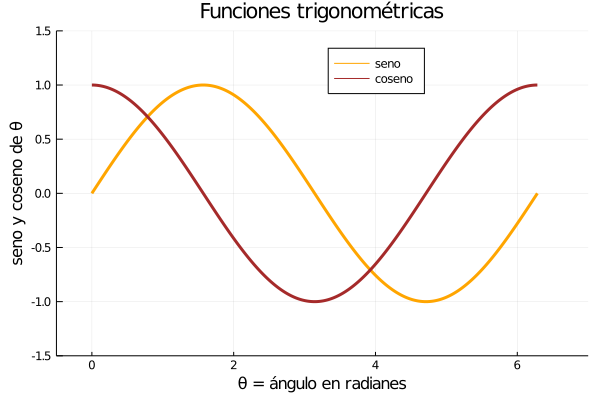

In [11]:
plot(x, y,
     xlim = (-0.5, 7.0), ylim = (-1.5, 1.5),
     lw = 3, 
     color = :orange,
     label = "seno",
     legend = (0.6, 0.9)
)
xaxis!("θ = ángulo en radianes") 
yaxis!("seno y coseno de θ")
title!("Funciones trigonométricas")
plot!(x, z, lw = 3, color = :brown, label = "coseno")

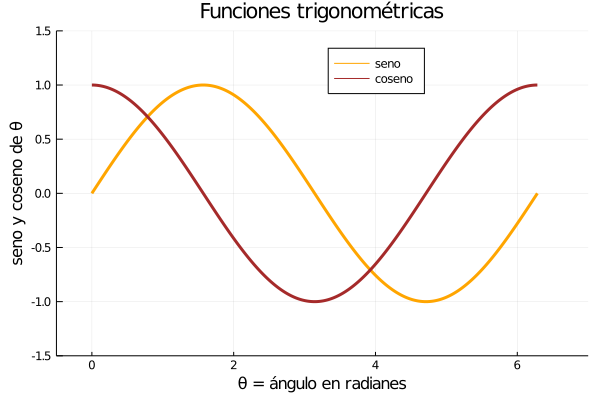

In [12]:
current() # genera nuevamente la última gráfica

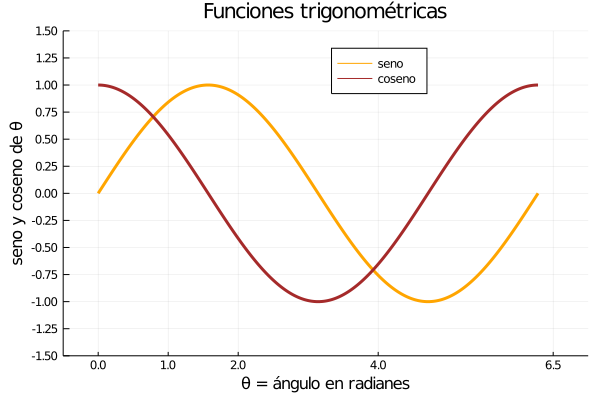

In [13]:
plot!(xticks = [0, 1, 2, 4, 6.5], yticks = -1.5:0.25:1.5)

Mediante `savefig` es posible guardar una gráfica en un archivo de imagen en formatos `.png` `.pdf` `.svg`, utilizando la extensión que corresponde en cada caso:

In [14]:
savefig("pininos.png")

In [15]:
savefig("pininos.pdf")

Es posible también guardar una gráfica como un objeto, que puede ser desplegado posteriormente:

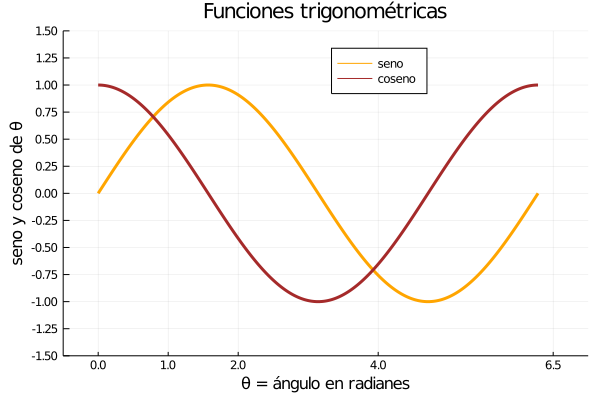

In [16]:
p = current()

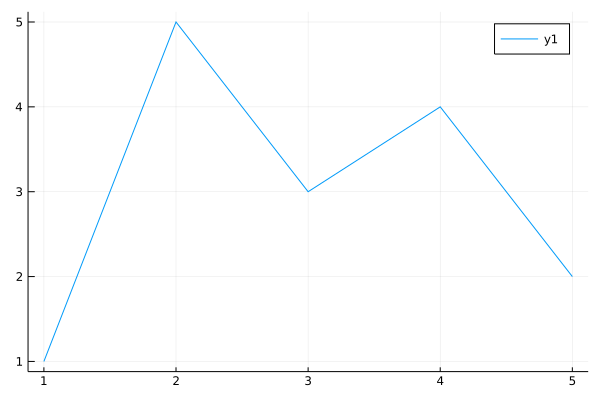

In [17]:
plot([1,5,3,4,2])

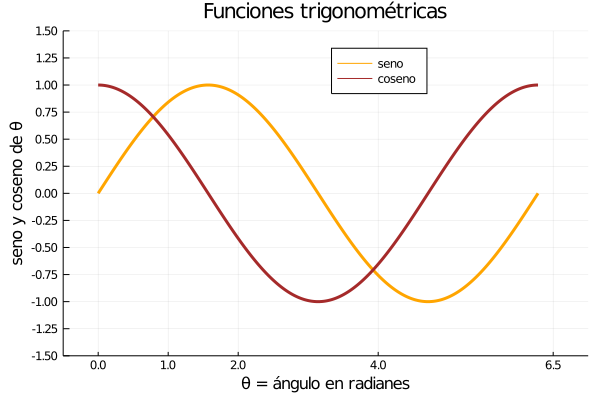

In [18]:
plot(p)

Hasta el momento tenemos lo siguiente:
```
plot(datos...; parámetros...)         # crear una nueva gráfica, recuperable mediante `current()`
plot!(datos...; parámetros...)        # agrega a la última gráfica, es decir `current()`
plot!(g, datos...; parámetros...)     # modifica la gráfica `g`
```

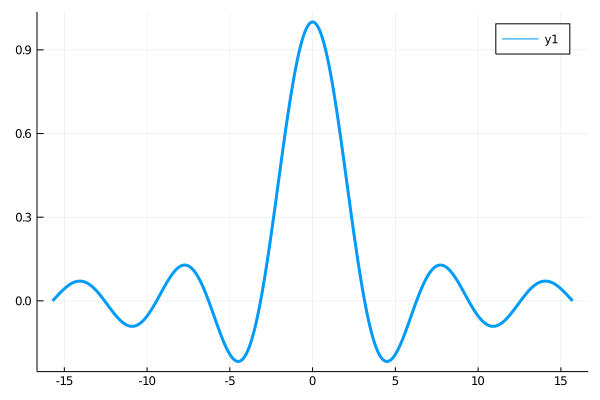

In [19]:
θ = range(-5π, 5π, length = 1000)
y = sin.(θ) ./ θ
plot(θ, y, lw = 3)

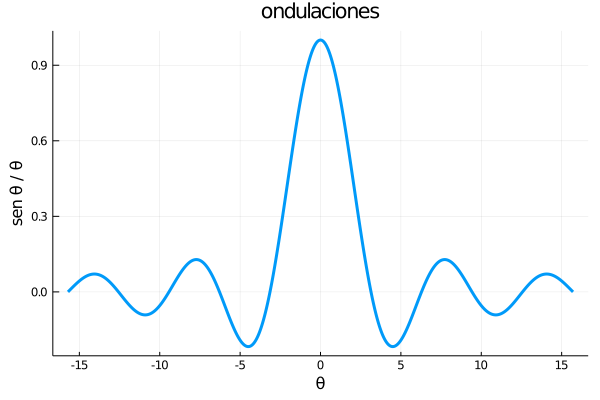

In [20]:
plot!(title = "ondulaciones", xlabel = "θ", ylabel = "sen θ / θ", legend = false)

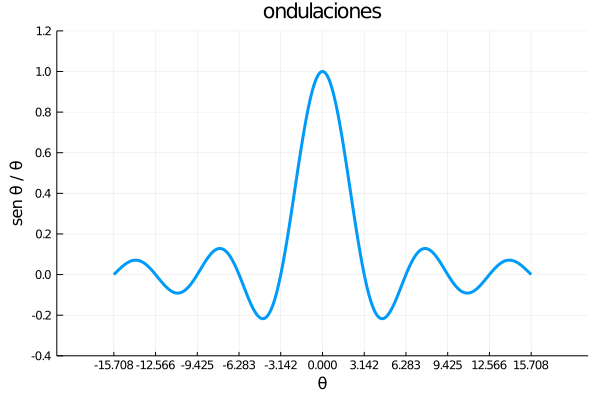

In [21]:
plot!(xlims = (-20, 20), ylims = (-0.4, 1.2), xticks = round.(-5π:π:5π, digits = 3), yticks = -0.4:0.2:1.2)

Crear una matriz de gráficas:

In [22]:
θ = range(-2π, 2π, length = 1000)
T = [sin.(θ) cos.(θ)]

1000×2 Array{Float64,2}:
  2.44929e-16  1.0
  0.0125786    0.999921
  0.0251552    0.999684
  0.0377279    0.999288
  0.0502946    0.998734
  0.0628533    0.998023
  0.0754021    0.997153
  0.0879389    0.996126
  0.100462     0.994941
  0.112969     0.993599
  0.125458     0.992099
  0.137927     0.990442
  0.150375     0.988629
  ⋮            
 -0.137927     0.990442
 -0.125458     0.992099
 -0.112969     0.993599
 -0.100462     0.994941
 -0.0879389    0.996126
 -0.0754021    0.997153
 -0.0628533    0.998023
 -0.0502946    0.998734
 -0.0377279    0.999288
 -0.0251552    0.999684
 -0.0125786    0.999921
 -2.44929e-16  1.0

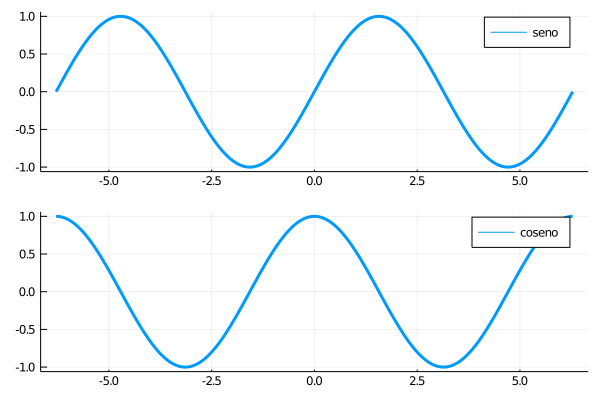

In [23]:
plot(θ, T, layout = (2, 1), lw = 3, label = ["seno" "coseno"])

In [24]:
rand(10) # genera números pseudo-aleatorios de manera uniforme en el intervalo [0,1[

10-element Array{Float64,1}:
 0.8358864336788467
 0.45266522216939675
 0.2633055498393728
 0.5437866401837381
 0.9044513263348626
 0.005795617261956654
 0.263181663410359
 0.22378171368395305
 0.49969967325626863
 0.33184795916002474

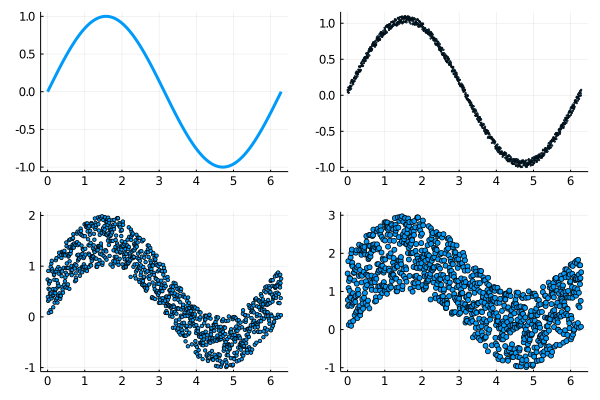

In [25]:
n = 1000
θ = range(0, 2π, length = n)
x = sin.(θ)
ε = rand(n)
p1 = plot(θ, x, legend = false, lw = 3)
p2 = scatter(θ, x .+ 0.1*ε, legend = false, markersize = 1)
p3 = scatter(θ, x .+ ε, legend = false, markersize = 2)
p4 = scatter(θ, x .+ 2*ε, legend = false, markersize = 3)
plot(p1, p2, p3, p4, legend = false, layout = (2, 2))

Unir puntos con líneas es fácil:

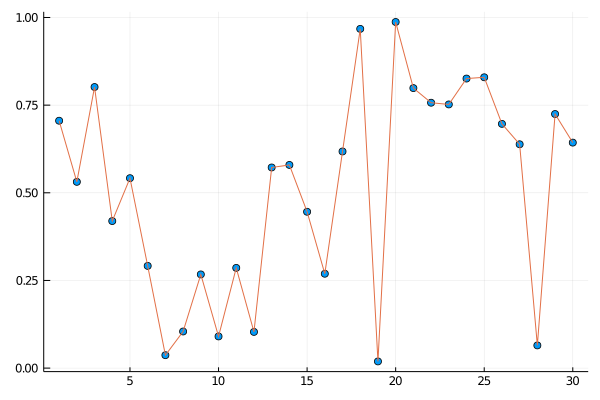

In [26]:
x = rand(30)
scatter(x, legend = false)
plot!(x)

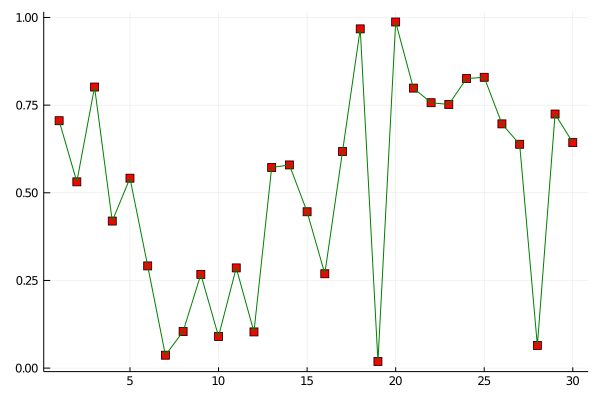

In [27]:
scatter(x, legend = false, markercolor = :red, markershape = :square)
plot!(x, color = :green)

Graficar en coordenadas polares: $r = f(\theta)$

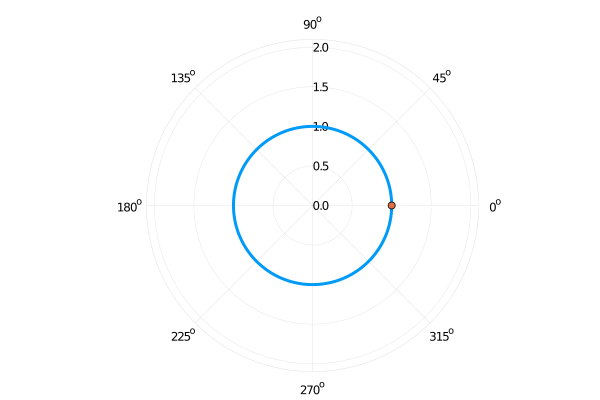

In [28]:
n = 1000
r = fill(1, n) # r = 1 (constante)
θ = range(0, 2π, length = n)
plot(θ, r, proj = :polar, legend = false, lw = 3)
scatter!([θ[1]], [r[1]]) # inicio

Transformación de coordenadas polares a cartesianas:

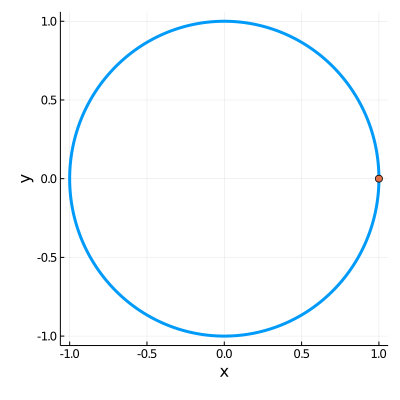

In [29]:
x = r .* cos.(θ)
y = r .* sin.(θ)
plot(x, y, legend = false, lw = 3, size = (400, 400), xlabel = "x", ylabel = "y")
scatter!([x[1]], [y[1]]) # inicio

Otro ejemplo:

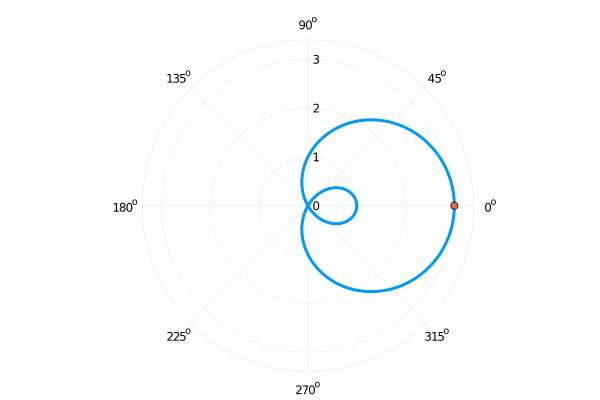

In [30]:
θ = range(0, 2π, length = 1000)
a = 1
b = 2
r = a .+ b.*cos.(θ)
plot(θ, r, proj = :polar, legend = false, lw = 3)
scatter!([θ[1]], [r[1]]) # inicio

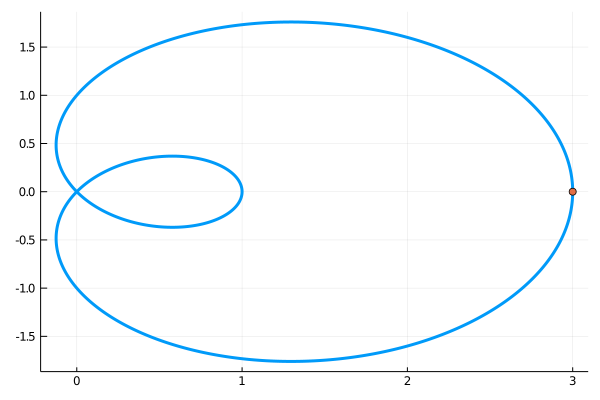

In [31]:
x = r .* cos.(θ)
y = r .* sin.(θ)
plot(x, y, lw = 3, legend = false)
scatter!([x[1]], [y[1]]) # inicio

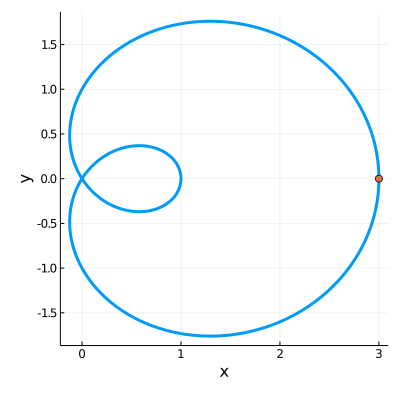

In [32]:
plot!(size = (400, 400), xlabel = "x", ylabel = "y")

Gráficas 3D: trayectorias $\mathbb{R}\rightarrow\mathbb{R}^3$

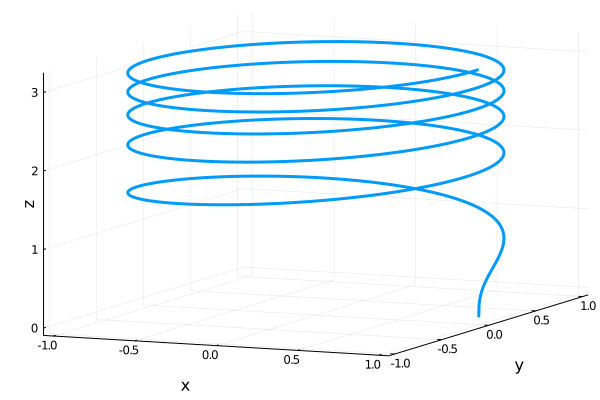

In [33]:
θ = range(0, 10π, length = 10000)
x = cos.(θ)
y = sin.(θ)
z = θ .^ (1/3)
plot(x, y, z, legend = false, lw = 3, xlabel = "x", ylabel = "y", zlabel = "z")

Gráficas 3D: superficies $\mathbb{R}^2\rightarrow\mathbb{R}$

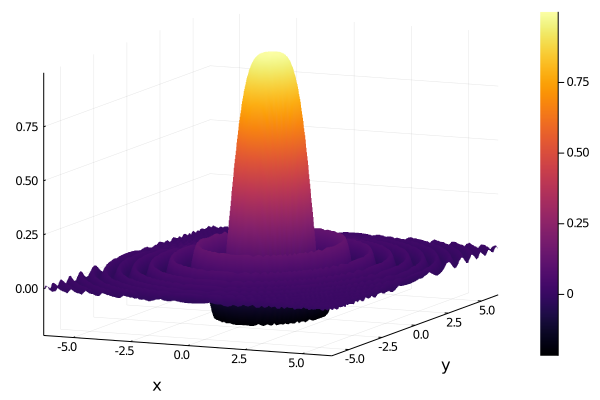

In [34]:
n = 100
x = range(-2π, 2π, length = n)
y = x
z = zeros(n, n)
f(x, y) = sin(x^2 + y^2)/(x^2 + y^2)
for i ∈ 1:n
    for j ∈ 1:n
        z[i, j] = f(x[i], y[j])
    end
end
plot(x, y, f, st = :surface, xlabel = "x", ylabel = "y")

Curvas de nivel:

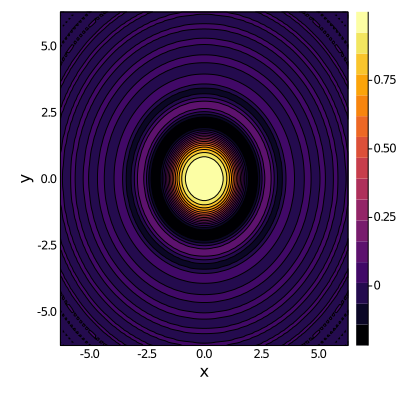

In [35]:
contour(x, y, z, xlabel = "x", ylabel = "y", size = (400, 400), fill = true)

Y para controlar la cantidad de niveles en la gráfica anterior, se especifica mediante `levels`

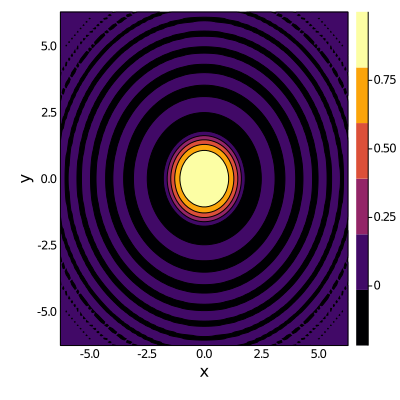

In [36]:
contour(x, y, z, xlabel = "x", ylabel = "y", size = (400, 400), fill = true, levels = 5)

Para una lista completa de parámetros gráficos, consultar: <http://docs.juliaplots.org/latest/generated/gr/>

Y para más detalles en general, consultar el manual:
> [Plots.jl](http://docs.juliaplots.org/latest/ "Julia Plots")

Otro paquete importante para hacer gráficas en `Julia` al estilo de `ggplot2` de `R` es el paquete `Gadfly.jl`
> [Gadfly.jl](http://gadflyjl.org/stable/)